In [1]:
import sys
sys.path.append('../')

import cv2
import pdb
import numpy as np
import albumentations as A
import matplotlib.pyplot as plt
%matplotlib inline

from src.utils.visum_utils import VisumData
from src.utils.transforms import create_transform, TRAIN_AUGMENTATIONS

args = {'data_path' : '../../../visum_data/train'}
xmin = 120; xmax = 392; ymin = 291; ymax = 456; epsilon = 20
if (0):
    dataset = VisumData(args['data_path'], modality='rgb', transforms=create_transform([])) #TRAIN_AUGMENTATIONS
else:
    crop_obj = A.Crop(x_min=xmin-epsilon, y_min=ymin-epsilon, x_max=xmax+epsilon, y_max=ymax+epsilon, p=1.0)
    TRAIN_AUGMENTATIONS.append(crop_obj)
    dataset = VisumData(args['data_path'], modality='rgb', transforms=create_transform(TRAIN_AUGMENTATIONS))

[Compose([
  HorizontalFlip(always_apply=0.5, p=0.5),
  OneOf([
    Blur(always_apply=False, p=0.5, blur_limit=(3, 5)),
    MedianBlur(always_apply=False, p=0.5, blur_limit=(3, 4)),
    MotionBlur(always_apply=False, p=0.5, blur_limit=(3, 4)),
  ], p=0.5),
  HueSaturationValue(always_apply=False, p=0.4, hue_shift_limit=(-15, 15), sat_shift_limit=(-20, 20), val_shift_limit=(-15, 15)),
  RGBShift(always_apply=False, p=0.5, r_shift_limit=(-20, 20), g_shift_limit=(-20, 20), b_shift_limit=(-20, 20)),
  GaussNoise(always_apply=False, p=0.5, var_limit=(10.0, 50.0)),
  CLAHE(always_apply=False, p=0.2, clip_limit=(1, 4.0), tile_grid_size=(8, 8)),
  RandomBrightnessContrast(always_apply=False, p=0.3, brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2)),
  RandomGamma(always_apply=False, p=0.5, gamma_limit=(80, 120)),
  ShiftScaleRotate(always_apply=False, p=0.5, shift_limit=(-0.03, 0.03), scale_limit=(-0.050000000000000044, 0.050000000000000044), rotate_limit=(-5, 5), interpolation=1, borde

 - boxes  :  [[ 34. 106.  55. 134.]]
 - labels :  [7.]


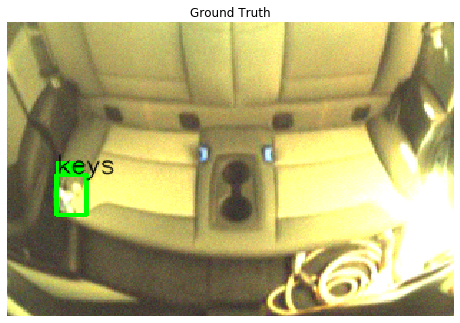

In [9]:
BOX_COLOR_TRUE = (0, 255, 0)
TEXT_COLOR_TRUE = (0, 0, 0)

category_id_to_name = {
    0: 'book', 1: 'bottle', 2: 'box', 3: 'cellphone',
    4: 'cosmetics', 5: 'glasses', 6: 'headphones', 7: 'keys',
    8: 'wallet', 9: 'watch', -1: 'n.a.'}

def visualize_bbox(img, bbox, class_id, class_idx_to_name, color_box, color_text, thickness=2, verbose=0):
    x_min, y_min, x_max, y_max = bbox
    x_min, y_min, x_max, y_max = int(x_min), int(y_min), int(x_max), int(y_max)
    
    # Have to do this since the annotations do not show up otherwise
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color_box, thickness=thickness)
    class_name = class_idx_to_name[class_id]
    # ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.25, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.5 * text_height)), (x_min + text_width, y_min), color_box, -1)
    cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color_text, lineType=cv2.LINE_AA)
    
    if verbose:
        print (' - x_min, y_min, x_max, y_max : ', x_min, y_min, x_max, y_max)
        print (' - class_id : ', class_id)
        plt.imshow(img)
        plt.show()
        
    return img

def visualize(annotations, category_id_to_name, save_dir='', verbose=0):
    if verbose:
        print (' - boxes  : ', annotations['boxes'])
        print (' - labels : ', annotations['labels'])
        
    if (1):
        image = np.array(annotations['image'])
        for idx, bbox in enumerate(annotations['boxes']):
            image = visualize_bbox(image, bbox, annotations['labels'][idx], category_id_to_name, BOX_COLOR_TRUE, TEXT_COLOR_TRUE)
            
    f,axarr = plt.subplots(1,1, figsize=(8,8))
    axarr.imshow(image)
    axarr.set_title('Ground Truth')
    axarr.set_xticks([])
    axarr.axis('off')
    plt.show()

if __name__ == "__main__":
    
    if (1):
        rand_idx = np.random.randint(len(dataset))
        each     = dataset[rand_idx]
        visualize({
                      'image' : (np.rollaxis(each[0].numpy(), 0, 3)*255).astype(np.uint8)
                    , 'boxes' : each[1]['boxes'].numpy()
                    , 'labels':each[1]['labels'].numpy()
                  }
                , category_id_to_name, verbose=1)
    else:
        for each in dataset:
            # print (each[2])
            if each[2] == 'RGB0826X.jpg':
                print (' - image : ', each[2], each[0].shape)
                visualize({
                              'image' : (np.rollaxis(each[0].numpy(), 0, 3)*255).astype(np.uint8)
                            , 'boxes' : each[1]['boxes'].numpy()
                            , 'labels':each[1]['labels'].numpy()
                          }
                        , category_id_to_name, verbose=1)
                break

[HorizontalFlip(always_apply=0.5, p=0.5), OneOf([
   Blur(always_apply=False, p=0.5, blur_limit=(3, 5)),
   MedianBlur(always_apply=False, p=0.5, blur_limit=(3, 4)),
   MotionBlur(always_apply=False, p=0.5, blur_limit=(3, 4)),
 ], p=0.5), HueSaturationValue(always_apply=False, p=0.4, hue_shift_limit=(-15, 15), sat_shift_limit=(-20, 20), val_shift_limit=(-15, 15)), RGBShift(always_apply=False, p=0.5, r_shift_limit=(-20, 20), g_shift_limit=(-20, 20), b_shift_limit=(-20, 20)), GaussNoise(always_apply=False, p=0.5, var_limit=(10.0, 50.0)), CLAHE(always_apply=False, p=0.2, clip_limit=(1, 4.0), tile_grid_size=(8, 8)), RandomBrightnessContrast(always_apply=False, p=0.3, brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2)), RandomGamma(always_apply=False, p=0.5, gamma_limit=(80, 120)), ShiftScaleRotate(always_apply=False, p=0.5, shift_limit=(-0.03, 0.03), scale_limit=(-0.050000000000000044, 0.050000000000000044), rotate_limit=(-5, 5), interpolation=1, border_mode=4, value=None), JpegCompr